In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import glob, os

pd.options.display.max_columns = None


def clean_hmotnost(text):
    m = re.search(r'(\d+(,|\.)\d+)(\s*KG)?', str(text), flags=re.I)
    if m:
        return float(m.group(1).replace(',', '.'))
    return None
classes = ['tourney', 'altus', 'acera', 'alivio', 'deore', 'slx', 'xtr', 'xt', 'sram']
classes_regexp = '({})'.format("|".join(classes))

# Load data
data = pd.concat(map(pd.read_csv, glob.glob("data/*.csv")), sort=False)

# normalize
#data['price'] = data['price'].astype(pd.Int64Dtype())
data['Rok'] = data['Rok'].astype(pd.Int64Dtype())
data['Hmotnost'] = data['Hmotnost'].apply(clean_hmotnost)
data['Rok'] = data['Rok'].fillna(
    data['name'] \
        .str.extract('(20[0-9]{2})$')[0] \
        .astype(float)
        .astype(pd.Int64Dtype())
)
data['ram_type'] = data['Rám'].str.lower() \
    .str.replace('dural', 'al') \
    .str.extract('(carbon|(^| )al)')[0] \
    .str.strip()


# Conditions
data = data[(data['price'] > 19000) & (data['price'] < 29000)]
#data = data[data['site'] == 'bezvakolo']
#data = data[(data['price'] > 30000)]

mojekolo     74
bezvakolo    19
mikebike     11
Name: site, dtype: int64

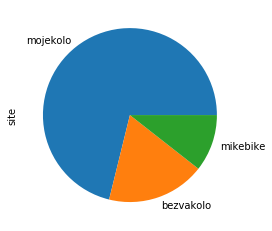

In [28]:
# graph it
data['site'].value_counts().plot(kind='pie')
data['site'].value_counts()

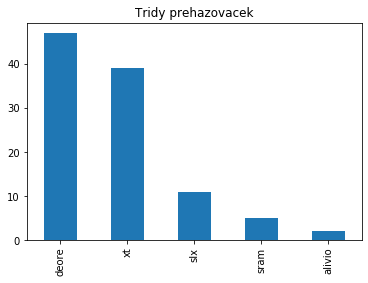

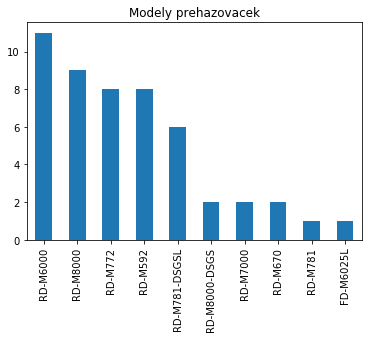

In [29]:
prehazovacky_fix = {
    'm360': 'acera',
    'm370': 'altus',
    'tx800': 'tourney',
    'TY500D': 'tourney',
    'M4000': 'alivio',
    'RD-M3000': 'acera',
    'RD-M6000': 'deore',
    'FD-M4020': 'alivio',
    'RDM310': 'altus'
}

def fix(items):
    def fun(s):
        for k, v in items.items():
            if k.lower() in s:
                return v
        return s
    return fun

data['prehazovacka_class'] = data['Přehazovačka'].astype(str) \
    .str.lower() \
    .apply(fix(prehazovacky_fix)) \
    .str.extract(classes_regexp, re.IGNORECASE)
data['prehazovacka_class'] = data['prehazovacka_class'].astype('category')
data['prehazovacka_class'].value_counts().plot(kind='bar', title='Tridy prehazovacek')
plt.show()

data['prehazovacka_model'] = data['Přehazovačka'] \
    .str.replace('(,|/|#|®)', ' ') \
    .str.replace('\s{2,}', ' ') \
    .str.extract('\s([A-Z]{2}-[^\s]+)')
data['prehazovacka_model'] = data['prehazovacka_model'].astype('category')
data['prehazovacka_model'].value_counts().plot(kind='bar', title='Modely prehazovacek')

## Hmotnost

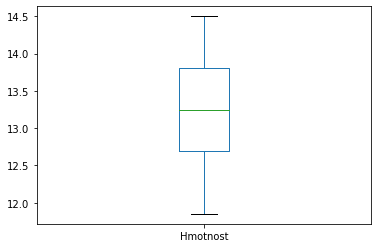

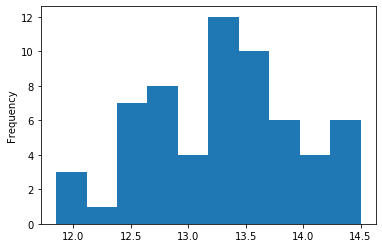

count    61.000000
mean     13.296885
std       0.656342
min      11.850000
25%      12.700000
50%      13.240000
75%      13.800000
max      14.500000
Name: Hmotnost, dtype: float64

In [30]:
data['Hmotnost'].plot.box(); plt.show()
data['Hmotnost'].plot.hist(); plt.show()
data['Hmotnost'].describe()

## Cena

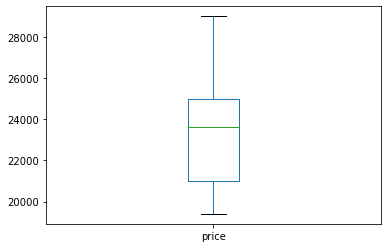

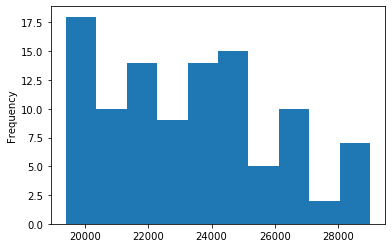

count      104.000000
mean     23463.894231
std       2684.809107
min      19399.000000
25%      20990.000000
50%      23599.000000
75%      24990.000000
max      28999.000000
Name: price, dtype: float64

In [31]:
data['price'].plot.box(); plt.show()
data['price'].plot.hist(); plt.show()
data['price'].describe()

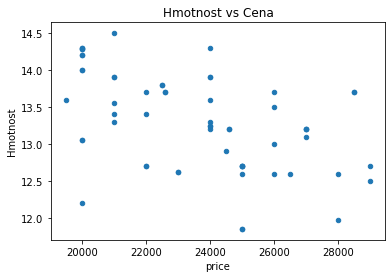

In [32]:
data.plot.scatter(x='price', y='Hmotnost', title='Hmotnost vs Cena')

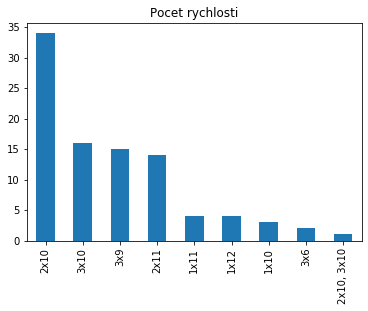

In [33]:
data['Počet rychlostí'] = data['Počet rychlostí'].replace({
    27: '3x9',
    20: '2x10',
    30: '3x10',
    22: '2x11',
    18: '3x6',
    12: '1x12',
    24: '2x12',
    11: '1x11',
    10: '1x10',
    21: '3x7',
})
data['Počet rychlostí'].value_counts().plot(kind='bar', title='Pocet rychlosti')

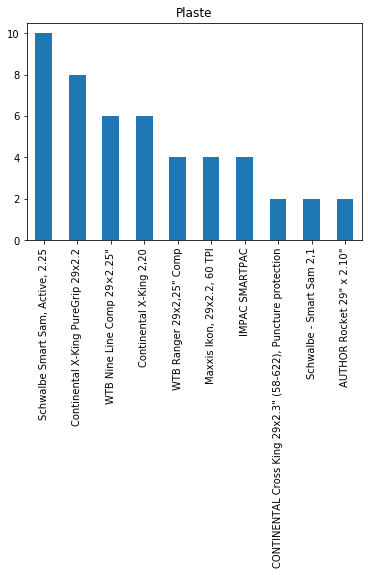

In [34]:
plaste = data['Pláště'].value_counts()
plaste[plaste > 1][0:10].plot(kind='bar', title='Plaste')

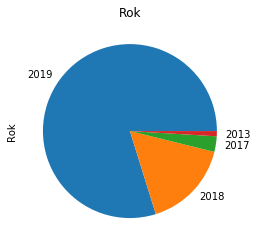

In [35]:
data['Rok'].value_counts().plot(kind='pie', title='Rok')

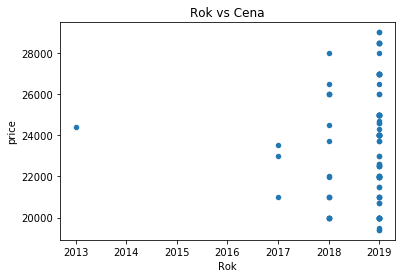

In [36]:
data.plot.scatter(x='Rok', y='price', title='Rok vs Cena')

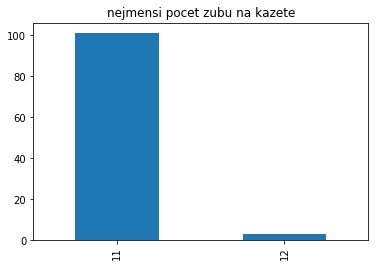

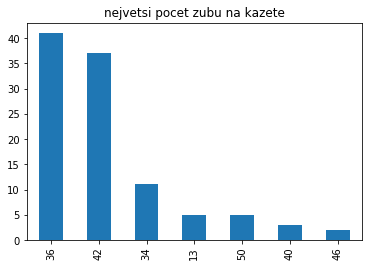

In [37]:
pd.set_option('display.max_rows', None)
x=data['Kazeta'].astype(str) \
    .str.extract('[ ,](?P<kazeta_low>[0-9]{2})[-/x](?P<kazeta_high>[0-9]{2})')
data['kazeta_low'] = x['kazeta_low'].astype(float).astype(pd.Int64Dtype())
data['kazeta_high'] = x['kazeta_high'].astype(float).astype(pd.Int64Dtype())

data['kazeta_low'].value_counts().plot(kind='bar', title='nejmensi pocet zubu na kazete'); plt.show()
data['kazeta_high'].value_counts().plot(kind='bar', title='nejvetsi pocet zubu na kazete')

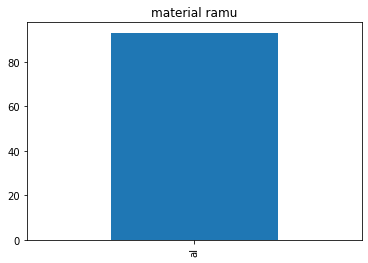

In [38]:
data['ram_type'].value_counts().plot(kind='bar', title='material ramu')

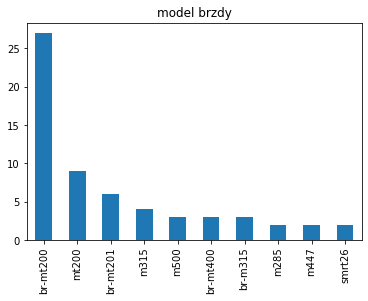

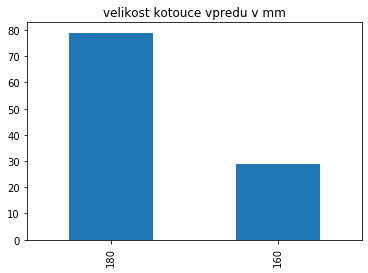

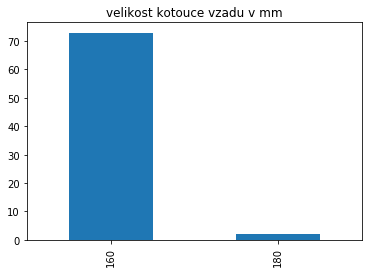

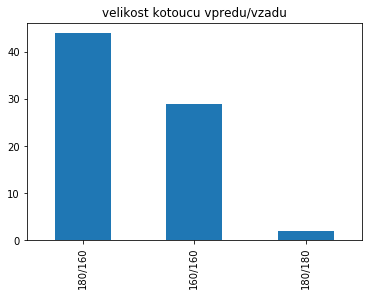

In [39]:
data['brzdy_type'] = data['Brzdy'] \
    .str.lower() \
    .str.extract('((MD|MT|BR|SM|STEF|M[0-9]{3})[^ ,]*)', flags=re.IGNORECASE)[0]

data['brzdy_manufacturer'] = data['Brzdy'] \
    .str.lower() \
    .str.extract('(shimano|tektro|sram|magura)', flags=re.IGNORECASE)[0]

data['brzdy_type'].value_counts()[0:10].plot(kind='bar', title='model brzdy'); plt.show()
data['brzdy_manufacturer'].value_counts()[0:10].plot(kind='bar')

x = data['Brzdy'].str.extract('(?P<front>1[0-9]{2})(.*?(?P<back>1[0-9]{2}))*')
x['f'] = data['Brzdy']
data['brzdy_front'] = x['front']
data['brzdy_back'] = x['back'].fillna(x['front'])

data['brzdy_front'].value_counts().plot(kind='bar', title='velikost kotouce vpredu v mm'); plt.show();
data['brzdy_back'].value_counts().plot(kind='bar', title='velikost kotouce vzadu v mm'); plt.show();

(data['brzdy_front'] + '/' + data['brzdy_back']).value_counts().plot(kind='bar', title='velikost kotoucu vpredu/vzadu'); plt.show();

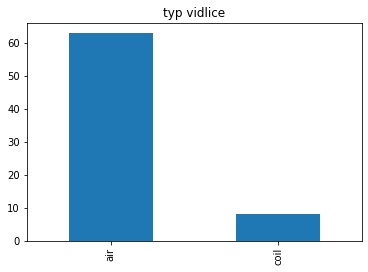

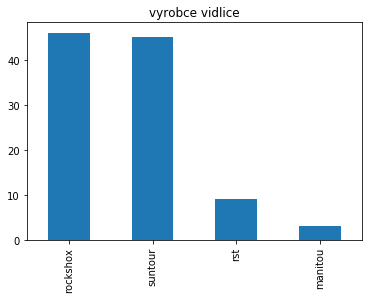

In [40]:
data['vidlice_type'] = data['Vidlice'] \
    .str.lower() \
    .str.extract('(air|coil|vzduch|hydra)').replace('vzduch', 'air')

data['vidlice_manufacturer'] = data['Vidlice'] \
    .str.lower() \
    .str.replace(' ', '') \
    .str.extract('(rst|manitou|suntour|rockshox)')

data['vidlice_type'].value_counts().plot(kind='bar', title='typ vidlice'); plt.show()
data['vidlice_manufacturer'].value_counts().plot(kind='bar', title="vyrobce vidlice")

,name,prehazovacka_class,presmykac_class,skore
14,MRX horské kolo SILURUS DEORE/SLX,slx,deore,1
27,Cube horské kolo ATTENTION iridium red,xt,deore,3
55,Cube horské kolo ACID grey orange,xt,slx,2
61,Cube horské kolo ACCESS WS RACE iridium blue,xt,deore,3
79,Cube horské kolo ATTENTION grey green,xt,deore,3
80,Cube horské kolo ATTENTION SL black white,xt,deore,3
81,Cube horské kolo ATTENTION SL blue orange,xt,deore,3
94,Cube horské kolo ACCESS WS RACE aubergine berry,xt,deore,3
95,Cube horské kolo ACCESS WS SL black mint,xt,slx,2
99,Head horské kolo X-RUBI III černá matná / červená,slx,deore,1


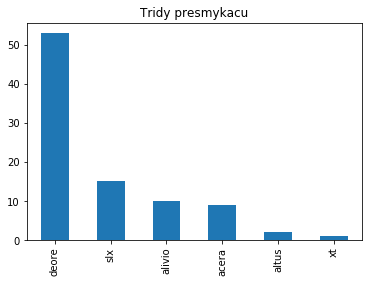

In [41]:
data.to_csv('/tmp/a.csv')
fixes = {
    'FD-M4000': 'alivio',
    'FD-M7020': 'slx',
    'TY700': 'tourney',
    'TY500': 'tourney',
    'FD-M2000': 'altus',
    'FD-M313': 'altus',
    'FD-M3000': 'acera',
    'M370': 'altus',
    'M3000': 'acera',
    'M313': 'altus',
    'M618L': 'deore',
    'M6020': 'deore',
    'FD-M8020': 'xt',
    'M2000': 'altus',
    'M4000': 'alivio',
    'FDM591': 'deore',
    'FDM6025': 'deore',
}

data['presmykac_class'] = data['Přesmykač'].astype(str) \
    .str.lower() \
    .apply(fix(fixes)) \
    .str.extract(classes_regexp, re.IGNORECASE)
data['presmykac_class'] = data['presmykac_class'].astype('category')
data['presmykac_class'].value_counts()#.plot(kind='bar', title='Tridy prehazovacek')

data[data['presmykac_class'].isnull() & ~data['Přesmykač'].isnull()][['presmykac_class', 'Přesmykač']]
data[data['presmykac_class'].isnull() & ~data['Přesmykač'].isnull()]['Přesmykač'].value_counts()

data['presmykac_class'].value_counts().plot(kind='bar', title='Tridy presmykacu')
data['presmykac_class'].cat.set_categories(classes, inplace=True, ordered=True)
data['prehazovacka_class'].cat.set_categories(classes, inplace=True, ordered=True)
chytak = data[data['presmykac_class'] != data['prehazovacka_class']][['name', 'prehazovacka_class', 'presmykac_class']]
chytak['skore'] = chytak['prehazovacka_class'].cat.codes - chytak['presmykac_class'].cat.codes
chytak
#.diff(data['prehazovacka_class'])

In [42]:
res = []
for col in data.columns:
    res.append([
        col,
        data[col].isnull().sum(),
        len(data[col]),
        int(data[col].isnull().sum() / len(data[col]) * 100)
    ])
res = pd.DataFrame(res)
res[res[3] < 10]
#print(data['Vidlice'].str.contains('remot|z řídít', flags=re.IGNORECASE).sum())
#data['Vidlice']

,0,1,2,3
0,url,0,104,0
1,price,0,104,0
2,name,0,104,0
3,Rok,0,104,0
4,Rám,0,104,0
6,Vidlice,0,104,0
9,Řazení,0,104,0
10,Přehazovačka,0,104,0
13,Kliky,0,104,0
15,Kazeta,0,104,0


In [43]:
data[data['name'].str.contains('RAYMON Nineray 6.0')].columns

Index(['url', 'price', 'name', 'Rok', 'Rám', 'Materiál', 'Vidlice',
       'Zdvih vidlice (mm)', 'Brzdy', 'Řazení', 'Přehazovačka', 'Přesmykač',
       'Počet rychlostí', 'Kliky', 'Středové složení', 'Kazeta', 'Řetěz',
       'Komponenty', 'Přední náboj', 'Zadní náboj', 'Ráfky', 'Pláště',
       'Řídítka', 'Představec', 'Sedlovka', 'Sedlo', 'Barva', 'site', 'Pedály',
       'Hlavové složení', 'Špice', 'Hmotnost', 'Unnamed: 6', 'Řidítka',
       'Velikost kol', 'Zdvih přední', 'Materiál rámu', 'ram_type',
       'prehazovacka_class', 'prehazovacka_model', 'kazeta_low', 'kazeta_high',
       'brzdy_type', 'brzdy_manufacturer', 'brzdy_front', 'brzdy_back',
       'vidlice_type', 'vidlice_manufacturer', 'presmykac_class'],
      dtype='object')

In [49]:
data[['prehazovacka_class', 'presmykac_class']]

,prehazovacka_class,presmykac_class
14,slx,deore
27,xt,deore
39,deore,deore
45,deore,deore
54,deore,deore
55,xt,slx
61,xt,deore
67,deore,deore
68,deore,deore
70,slx,slx
